In [ ]:
!pip install sodapy
!pip pathlib

In [20]:
import pandas as pd
import numpy as np
from sodapy import Socrata

In [21]:
client = Socrata("www.datos.gov.co", None)

In [22]:
results = client.get("p6dx-8zbt", where = 'tipo_de_contrato = "Obra"',limit=300000) # SECOP II - Procesos de Contratación results = client.get("p6dx-8zbt", limit=70000)

In [ ]:
results = client.get("p6dx-8zbt", where = 'tipo_de_contrato = "Obra"')

In [23]:
len(results)

34896

In [24]:
results_df = pd.DataFrame.from_records(results)

In [25]:
results_df2= results_df.sample(frac=0.2)

In [26]:
results_df.shape ## 57 variables

(34896, 57)

In [32]:
columns_names = results_df.columns.values
columns_names

array(['entidad', 'nit_entidad', 'departamento_entidad', 'ciudad_entidad',
       'ordenentidad', 'codigo_pci', 'id_del_proceso',
       'referencia_del_proceso', 'ppi', 'id_del_portafolio',
       'nombre_del_procedimiento', 'descripci_n_del_procedimiento',
       'fase', 'fecha_de_publicacion_del', 'fecha_de_ultima_publicaci',
       'fecha_de_publicacion_fase_3', 'precio_base',
       'modalidad_de_contratacion', 'justificaci_n_modalidad_de',
       'duracion', 'unidad_de_duracion', 'fecha_de_recepcion_de',
       'fecha_de_apertura_de_respuesta', 'fecha_de_apertura_efectiva',
       'ciudad_de_la_unidad_de', 'nombre_de_la_unidad_de',
       'proveedores_invitados', 'proveedores_con_invitacion',
       'visualizaciones_del', 'proveedores_que_manifestaron',
       'respuestas_al_procedimiento', 'respuestas_externas',
       'conteo_de_respuestas_a_ofertas', 'proveedores_unicos_con',
       'numero_de_lotes', 'estado_del_procedimiento',
       'id_estado_del_procedimiento', 'adjudicad

In [35]:
seleccion = results_df[['precio_base','duracion','proveedores_invitados', 'proveedores_con_invitacion','visualizaciones_del', 'proveedores_que_manifestaron','respuestas_al_procedimiento', 'respuestas_externas','conteo_de_respuestas_a_ofertas', 'proveedores_unicos_con','numero_de_lotes','valor_total_adjudicacion']]
seleccion

,precio_base,duracion,proveedores_invitados,proveedores_con_invitacion,visualizaciones_del,proveedores_que_manifestaron,respuestas_al_procedimiento,respuestas_externas,conteo_de_respuestas_a_ofertas,proveedores_unicos_con,numero_de_lotes,valor_total_adjudicacion
0,5339567,10,10,0,0,0,1,0,0,1,0,4849395
1,618278810,3,114,0,0,0,0,0,0,0,0,0
2,107000000,10,0,0,0,0,0,0,0,0,0,0
3,28000000,1,0,0,0,0,0,0,0,0,0,0
4,744028100,2,217,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
34891,337331372,0,10,10,0,0,1,0,0,1,0,330160274
34892,908000000,6,72,0,0,0,0,0,0,0,0,0
34893,16553416866,6,153,0,0,0,20,0,0,20,5,19559892415
34894,386996996,60,73,0,0,0,0,0,0,0,0,0


In [38]:
seleccion['precio_base'] = seleccion['precio_base'].astype('int64')
seleccion['duracion'] = seleccion['duracion'].astype('int64')
seleccion['proveedores_invitados'] = seleccion['proveedores_invitados'].astype('int64')
seleccion['proveedores_con_invitacion'] = seleccion['proveedores_con_invitacion'].astype('int64')
seleccion['visualizaciones_del'] = seleccion['visualizaciones_del'].astype('int64')
seleccion['proveedores_que_manifestaron'] = seleccion['proveedores_que_manifestaron'].astype('int64')
seleccion['respuestas_al_procedimiento'] = seleccion['respuestas_al_procedimiento'].astype('int64')
seleccion['respuestas_externas'] = seleccion['respuestas_externas'].astype('int64')
seleccion['conteo_de_respuestas_a_ofertas'] = seleccion['conteo_de_respuestas_a_ofertas'].astype('int64')
seleccion['proveedores_unicos_con'] = seleccion['proveedores_unicos_con'].astype('int64')
seleccion['numero_de_lotes'] = seleccion['numero_de_lotes'].astype('int64')
seleccion['valor_total_adjudicacion'] = seleccion['valor_total_adjudicacion'].astype('int64')

/tmp/ipykernel_38664/1108188720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seleccion['precio_base'] = seleccion['precio_base'].astype('int64')
/tmp/ipykernel_38664/1108188720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seleccion['duracion'] = seleccion['duracion'].astype('int64')
/tmp/ipykernel_38664/1108188720.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [39]:
seleccion.dtypes

precio_base                       int64
duracion                          int64
proveedores_invitados             int64
proveedores_con_invitacion        int64
visualizaciones_del               int64
proveedores_que_manifestaron      int64
respuestas_al_procedimiento       int64
respuestas_externas               int64
conteo_de_respuestas_a_ofertas    int64
proveedores_unicos_con            int64
numero_de_lotes                   int64
valor_total_adjudicacion          int64
dtype: object

In [40]:
seleccion.describe()

,precio_base,duracion,proveedores_invitados,proveedores_con_invitacion,visualizaciones_del,proveedores_que_manifestaron,respuestas_al_procedimiento,respuestas_externas,conteo_de_respuestas_a_ofertas,proveedores_unicos_con,numero_de_lotes,valor_total_adjudicacion
count,3.489600e+04,34896.000000,34896.000000,34896.000000,34896.0,34896.0,34896.000000,34896.000000,34896.0,34896.000000,34896.000000,3.489600e+04
mean,6.385117e+09,36.643799,85.413343,5.251290,0.0,0.0,4.944779,0.013440,0.0,4.931224,0.416925,4.186227e+09
std,1.210529e+11,88.056536,135.351213,22.685905,0.0,0.0,15.006337,0.233754,0.0,14.998770,2.357351,1.072132e+11
min,-3.971665e+08,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00
25%,9.300000e+07,3.000000,10.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00
50%,3.000000e+08,7.000000,51.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00
75%,1.000000e+09,35.000000,121.000000,0.000000,0.0,0.0,3.000000,0.000000,0.0,3.000000,0.000000,1.178246e+08
max,1.321229e+13,3600.000000,5180.000000,389.000000,0.0,0.0,254.000000,17.000000,0.0,254.000000,38.000000,1.328415e+13


In [41]:
seleccion.corr()

,precio_base,duracion,proveedores_invitados,proveedores_con_invitacion,visualizaciones_del,proveedores_que_manifestaron,respuestas_al_procedimiento,respuestas_externas,conteo_de_respuestas_a_ofertas,proveedores_unicos_con,numero_de_lotes,valor_total_adjudicacion
precio_base,1.000000,0.007897,0.024143,-0.011105,NaN,NaN,0.026794,-0.001503,NaN,0.026832,0.068925,0.386627
duracion,0.007897,1.000000,-0.036677,-0.012856,NaN,NaN,-0.043894,-0.003692,NaN,-0.043856,-0.021591,0.012745
proveedores_invitados,0.024143,-0.036677,1.000000,0.030483,NaN,NaN,0.082316,0.014523,NaN,0.082131,0.017884,0.005381
proveedores_con_invitacion,-0.011105,-0.012856,0.030483,1.000000,NaN,NaN,0.168625,0.079133,NaN,0.167479,-0.007877,-0.007829
visualizaciones_del,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
proveedores_que_manifestaron,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
respuestas_al_procedimiento,0.026794,-0.043894,0.082316,0.168625,NaN,NaN,1.000000,0.039271,NaN,0.999878,0.286289,0.028381
respuestas_externas,-0.001503,-0.003692,0.014523,0.079133,NaN,NaN,0.039271,1.000000,NaN,0.023706,0.055410,-0.000790
conteo_de_respuestas_a_ofertas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
proveedores_unicos_con,0.026832,-0.043856,0.082131,0.167479,NaN,NaN,0.999878,0.023706,NaN,1.000000,0.285571,0.028408


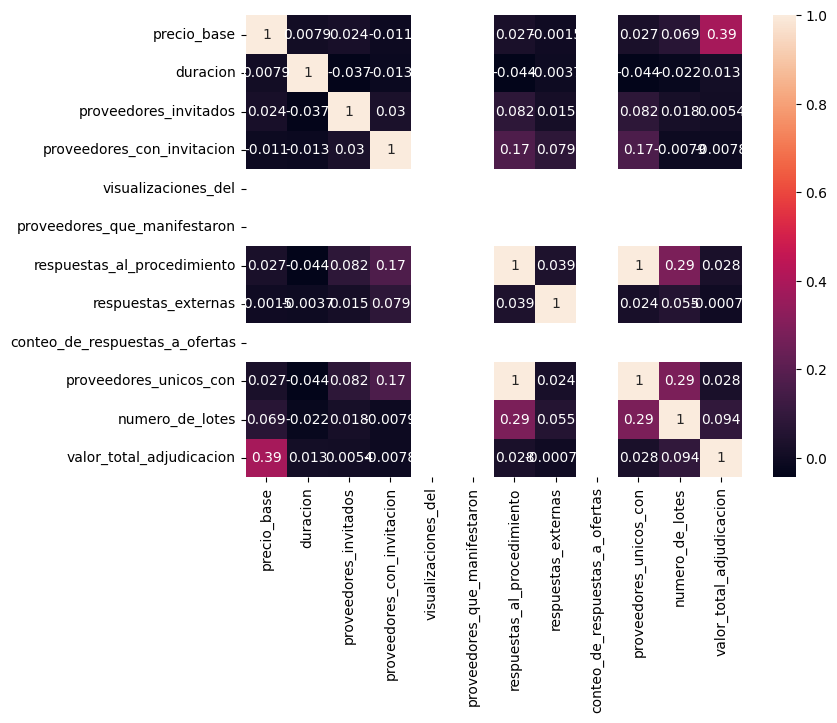

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_df = seleccion.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [11]:
with pd.option_context( 'display.max_columns', None):
    display(results_df)

,entidad,nit_entidad,departamento_entidad,ciudad_entidad,ordenentidad,codigo_pci,id_del_proceso,referencia_del_proceso,ppi,id_del_portafolio,nombre_del_procedimiento,descripci_n_del_procedimiento,fase,fecha_de_publicacion_del,fecha_de_ultima_publicaci,fecha_de_publicacion_fase_3,precio_base,modalidad_de_contratacion,justificaci_n_modalidad_de,duracion,unidad_de_duracion,fecha_de_recepcion_de,fecha_de_apertura_de_respuesta,fecha_de_apertura_efectiva,ciudad_de_la_unidad_de,nombre_de_la_unidad_de,proveedores_invitados,proveedores_con_invitacion,visualizaciones_del,proveedores_que_manifestaron,respuestas_al_procedimiento,respuestas_externas,conteo_de_respuestas_a_ofertas,proveedores_unicos_con,numero_de_lotes,estado_del_procedimiento,id_estado_del_procedimiento,adjudicado,id_adjudicacion,codigoproveedor,departamento_proveedor,ciudad_proveedor,fecha_adjudicacion,valor_total_adjudicacion,nombre_del_adjudicador,nombre_del_proveedor,nit_del_proveedor_adjudicado,codigo_principal_de_categoria,estado_de_apertura_del_proceso,tipo_de_contrato,subtipo_de_contrato,categorias_adicionales,urlproceso,codigo_entidad,estadoresumen,fecha_de_publicacion,fecha_de_publicacion_fase_2
0,SUPERINTENDENCIA DE SOCIEDADES,899999086,No Definido,No Definido,Nacional,Si,CO1.REQ.107802,56 DE 2016,35-02-00,CO1.BDOS.105401,DEMOLICIÓN CARCAMO SOTANO,DEMOLICIÓN DEL CÁRCAMO UBICADO EN EL SOTANO DE...,Presentación de oferta,2016-11-24T00:00:00.000,2016-11-24T00:00:00.000,2016-11-24T00:00:00.000,5339567,Mínima cuantía,Presupuesto inferior al 10% de la menor cuantía,10,Dias,2016-11-30T00:00:00.000,2016-11-30T00:00:00.000,2016-11-30T00:00:00.000,Bogotá,SUBDIRECCION ADMINISTRATIVA,10,0,0,0,1,0,0,1,0,Adjudicado,70,Si,CO1.AWD.71604,700448046,Arauca,Arauca,2016-12-12T00:00:00.000,4849395,SARA LUCIA ESCOBAR ZULUAGA,Construcciones AMG SAS,No Definido,V1.72121103,Cerrado,Obra,No Especificado,ND,{'url': 'https://community.secop.gov.co/Public...,700326093,Adjudicado,NaN,NaN
1,INSTITUTO NACIONAL DE VIAS,800215807,Distrito Capital de Bogotá,Bogotá,Nacional,No,CO1.REQ.419945,SA-MC-DT-OCA-004-2018 (Manifestación de interé...,24-02-00,CO1.BDOS.394474,MANTENIMIENTO PARA LA CARRETERA SAN ALBERTO L...,MANTENIMIENTO PARA LA CARRETERA SAN ALBERTO L...,Manifestación de interés (Menor Cuantía),2018-04-26T00:00:00.000,2018-04-26T00:00:00.000,NaN,618278810,Selección Abreviada de Menor Cuantía,Presupuesto menor al 10% de la Menor Cuantía,3,Meses,2018-05-15T00:00:00.000,2018-05-15T00:00:00.000,2018-05-15T00:00:00.000,Ocaña,Dirección Territorial Ocaña,114,0,0,0,0,0,0,0,0,Adjudicado,70,No,No Adjudicado,No Adjudicado,No aplica,No aplica,NaN,0,No Adjudicado,No Adjudicado,No Adjudicado,V1.72141000,Cerrado,Obra,No Especificado,ND,{'url': 'https://community.secop.gov.co/Public...,700676059,Manifestación de interés (Menor Cuantía),2018-04-26T00:00:00.000,NaN
2,INSTITUTO DE INFRAESTRUCTURA Y CONCESIONES DE ...,900258711,No Definido,No Definido,Territorial,Si,CO1.REQ.3384622,ICCU-CTO-293 DE 2022,ND,CO1.BDOS.3297326,ICCUCTO293 DE 2022,AUNAR ESFUERZOS TÉCNICOS ADMINISTRATIVOS Y FIN...,Presentación de oferta,2022-09-20T00:00:00.000,2022-09-20T00:00:00.000,2022-09-20T00:00:00.000,107000000,Contratación directa,ContratosConveniosInteradministrativosValorCero,10,Meses,NaN,NaN,NaN,Bogotá,JURIDICA,0,0,0,0,0,0,0,0,0,Adjudicado,70,No,No Adjudicado,No Adjudicado,No aplica,No aplica,NaN,0,No Adjudicado,No Adjudicado,No Adjudicado,V1.95111600,Abierto,Obra,No Especificado,ND,{'url': 'https://community.secop.gov.co/Public...,702046087,Adjudicado,NaN,NaN
3,MUNICIPIO DE EL BAGRE,890984221,No Definido,No Definido,Territorial,Si,CO1.REQ.3561961,CONV-256-2022,ND,CO1.BDOS.3470514,CONTRATO INTERADMINISTRATIVO DE MANDATO SIN RE...,CONTRATO INTERADMINISTRATIVO DE MANDATO SIN RE...,Presentación de oferta,2022-11-02T00:00:00.000,2022-11-02T00:00:00.000,2022-11-02T00:00:00.000,28000000,Contratación directa,ContratosConveniosInteradministrativosValorCero,1,Meses,NaN,NaN,NaN,El Bagre,SECRETARIA DE PLANEACION,0,0,0,0,0,0,0,0,0,Adjudi

In [12]:
results_df.loc[:,'tipo_de_contrato'].unique() # Valores unicos de la variable tipo de contrato

array(['Obra'], dtype=object)

In [ ]:
#results_df.to_csv("results_df.csv", index = False, sep = ";") # Se exporta a csv para tenerlo de foma local

In [ ]:
#import pandas as pd

#df = pd.read_csv('results_df.csv',sep=';')
#df

In [13]:
results_df.describe() # Estadisticas descriptivas d elas variables

,entidad,nit_entidad,departamento_entidad,ciudad_entidad,ordenentidad,codigo_pci,id_del_proceso,referencia_del_proceso,ppi,id_del_portafolio,...,codigo_principal_de_categoria,estado_de_apertura_del_proceso,tipo_de_contrato,subtipo_de_contrato,categorias_adicionales,urlproceso,codigo_entidad,estadoresumen,fecha_de_publicacion,fecha_de_publicacion_fase_2
count,34896,34896,34896,34896,34896,34896,34896,34896,34896,34896,...,34896,34896,34896,34896,34896,34896,34896,34896,4996,8954
unique,1871,1685,33,348,3,2,33601,31810,464,20056,...,1094,2,1,1,4239,33512,1886,11,1113,1357
top,INSTITUTO NACIONAL DE VIAS,800215807,No Definido,No Definido,Territorial,No,CO1.REQ.976985,LP-DT-CAU-003-2019_3 (Fase de Selección (Prese...,ND,CO1.BDOS.927424,...,V1.72101500,Cerrado,Obra,No Especificado,ND,{'url': 'https://community.secop.gov.co/STS/Us...,700676059,Adjudicado,2021-10-11T00:00:00.000,2022-04-29T00:00:00.000
freq,3694,3694,12248,13572,19333,19086,35,35,20433,36,...,4269,27312,34896,34896,17758,90,3694,17584,39,44


In [14]:
!pip install pandas-profiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/missingno/missingno.py:254: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(
/opt/conda/lib/python3.10/site-packages/pandas_profiling/model/missing.py:89: UserWarning: There was an attempt to generate the Count missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Count": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/pandas-profiling/issues
(include the error message: 'The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (57).')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

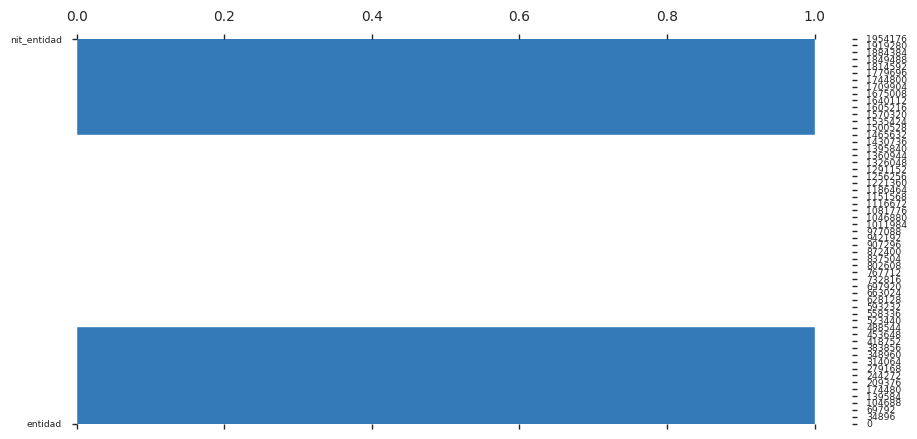

In [16]:
from pandas_profiling import ProfileReport #Reporte de variables 
prof = ProfileReport(results_df)
prof.to_file(output_file='output2.html')

In [18]:
results_df.drop('descripci_n_del_procedimiento', inplace=True, axis=1)
results_df.drop('nombre_del_procedimiento', inplace=True, axis=1)
results_df.drop('urlproceso', inplace=True, axis=1)

In [ ]:
results_df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]